# Mini-project 02 Background
Wednesday, Nov 02, 2022

## *Background: Oscillatory phenomena*

Dealing with oscillatory phenomena numerically sometimes leads to unexpected surprises. Problems can occur when you are trying to plot an oscillating function with an insufficient number of points, where there are only a few points per period (or less). This is a sampling problem, which can take various forms in physics, signal analysis, etc... Properly sampling a function is an important question in many practical experimental situations. Some general discussion on sample issues can be found at:

* https://en.wikipedia.org/wiki/Sampling_(signal_processing)

To make this clear with a practical example, imagine you want to plot the decaying oscillatory function

$$\cos(30x)e^{-x/4}.$$

The period for this function is $2\pi/30 \approx 0.209$. 

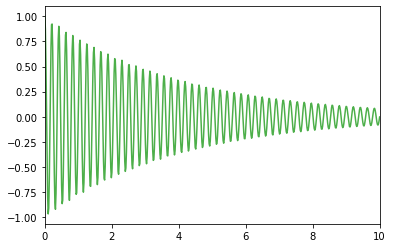

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 600)
plt.plot(x, np.cos(30. * x) * np.exp(-x / 4.), color='#4daf4a')
plt.xlim([0, 10])
plt.show()

Now imagine we plot the same function with the following sampling, which is approximately half of the oscillation period. What happens is that you find that there is an artificial 'beat' pattern, shown in orange.

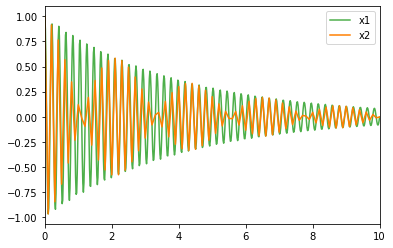

In [13]:
# Sampling frequency Range is ~ 1/6 of x2
# (3x as wide and ~1/2 as many points)
x2 = np.linspace(0, 30, 301)
plt.plot(x, np.cos(30. * x) * np.exp(-x / 4.), color='#4daf4a', label="x1")
plt.plot(x2, np.cos(30. * x2) * np.exp(-x2 / 4.), color='#ff7f00', label="x2")
plt.xlim([0, 10])
plt.legend()
plt.show()

It is important to be aware of this potential problem when plotting highly oscillating functions. This problem is also known as "aliasing", and it occurs when you under-sample a high frequency wave, causing you to misinterpret it as a longer wavelength. 

The concept of Nyquist frequency is particularly important:

* https://en.wikipedia.org/wiki/Nyquist_frequency


## *Resonance of a series RLC resonant circuit*

In this project, you will study the resonance of a series RLC resonant circuit. You may have studied resonant behaviour with this kind of circuit or with a mass and spring system in an earlier course, but it is not important if you have not seen this kind of system before. You can read more about this resonant circuit at:

* https://en.wikipedia.org/wiki/RLC_circuit (from which the following figure comes, credit: V4711, CC-BY-SA 3.0 https://creativecommons.org/licenses/by-sa/3.0 )

<img src="project02-rlc.png" width="50">

The amount of charge on the capacitor can be shown to obey the following differential equation:

$$\frac{d^2q}{dt^2}+\frac{R}{L}\frac{dq}{dt}+\frac{1}{LC}q=\frac{1}{L}V(t).$$

The current in the circuit is $I = dq/dt$. When driven by a sinusoidal voltage supply, $V(t) = V_0 cos(\omega t)$, the system can be described by two characteristic frequencies: 

1. The frequency of the voltage source, $\omega$, and
1. The natural angular frequency of the capacitor/inductor combination:

$$ω_0=1/\sqrt{LC}.$$

The behaviour of the circuit changes based on the following broad categories:

* Overdamped: $R>2\sqrt{L⁄C}$, 
* Critically dampled: $R=2\sqrt{L⁄C}$ or 
* Underdamped: $R<2\sqrt{L⁄C}$.

If you have not previously encountered this idea of damping in oscillatory systems, we encourage you to spend a bit of time exploring the topic (a readonable starting point: https://en.wikipedia.org/wiki/Damping). Broadly, damping is a measure of how quickly an oscillatory system will come to a steady state condition. In the example of the RLC circuits we will be exploring, which are driven by an external sinusoidal power supply, this will be how quickly the current in the system comes to oscillate with a constant amplitude. When the system is...

* Underdamped - it will take many oscillations for the amplitude to settle into a constant amplitude;
* Critically damped - it will take approximately one full oscillation for the amplitude to settle into a constant amplitude; and
* Overdamped - it will take less than one full oscillation for the amplitude to settle into a constant amplitude.

In this project, we’ll explore the response of the circuit in these three conditions using `solve_ivp()`.